In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from wakeful import log_munger, metrics, virus_total
%matplotlib inline

In [2]:
%pwd

'/Users/rob/Google_Drive/Datascience/Galvanize/Project/wakeful_proj'

### Build the Normal Data Set

In [3]:
norm_path = './data/home/2018-01-01'

Successfully monitoring ./data/home/2018-01-01/dns.03:00:00-04:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.16:00:00-17:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.12:00:00-13:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.11:00:00-12:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.15:00:00-16:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.17:00:00-18:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.08:00:00-09:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.14:00:00-15:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.10:00:00-11:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.19:00:00-20:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.02:00:00-03:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.06:00:00-07:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.20:00:00-21:00:00.log...
Successfully

In [5]:
print(dns_norm_df.shape)

(34789, 23)


In [6]:
dns_norm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34789 entries, 2017-12-31 20:00:06.032915 to 2017-12-31 18:59:50.455547
Data columns (total 23 columns):
AA             34789 non-null bool
RA             34789 non-null bool
RD             34789 non-null bool
TC             34789 non-null bool
TTLs           34789 non-null object
Z              34789 non-null int64
answers        34789 non-null object
id.orig_h      34789 non-null object
id.orig_p      34789 non-null int64
id.resp_h      34789 non-null object
id.resp_p      34789 non-null int64
proto          34789 non-null object
qclass         34789 non-null int64
qclass_name    34789 non-null object
qtype          34789 non-null int64
qtype_name     34789 non-null object
query          34789 non-null object
rcode          34789 non-null int64
rcode_name     34789 non-null object
rejected       34789 non-null bool
rtt            34789 non-null timedelta64[ns]
trans_id       34789 non-null int64
uid            34789 non-null object

In [7]:
conn_norm_df = log_munger.bro_logs_to_df(norm_path, 'conn');

Successfully monitoring ./data/home/2018-01-01/conn.12:00:00-13:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.16:00:00-17:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.03:00:00-04:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.08:00:00-09:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.10:00:00-11:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.14:00:00-15:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.19:00:00-20:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.15:00:00-16:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.11:00:00-12:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.17:00:00-18:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.21:00:00-22:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.13:00:00-14:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.23:00:00-00:00:00.log...

In [8]:
conn_norm_df.shape

(58264, 23)

In [9]:
conn_norm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58264 entries, 2018-01-01 04:58:54.140342 to 2017-12-31 17:58:57.102639
Data columns (total 23 columns):
conn_state        58264 non-null object
duration          58264 non-null timedelta64[ns]
history           58264 non-null object
id.orig_h         58264 non-null object
id.orig_p         58264 non-null int64
id.resp_h         58264 non-null object
id.resp_p         58264 non-null int64
local_orig        58264 non-null bool
local_resp        58264 non-null bool
missed_bytes      58264 non-null int64
orig_bytes        58264 non-null int64
orig_cc           58264 non-null object
orig_ip_bytes     58264 non-null int64
orig_pkts         58264 non-null int64
proto             58264 non-null object
resp_bytes        58264 non-null int64
resp_cc           58264 non-null object
resp_ip_bytes     58264 non-null int64
resp_pkts         58264 non-null int64
sensorname        58264 non-null object
service           58264 non-null object
tunnel

In [10]:
dns_norm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34789 entries, 2017-12-31 20:00:06.032915 to 2017-12-31 18:59:50.455547
Data columns (total 23 columns):
AA             34789 non-null bool
RA             34789 non-null bool
RD             34789 non-null bool
TC             34789 non-null bool
TTLs           34789 non-null object
Z              34789 non-null int64
answers        34789 non-null object
id.orig_h      34789 non-null object
id.orig_p      34789 non-null int64
id.resp_h      34789 non-null object
id.resp_p      34789 non-null int64
proto          34789 non-null object
qclass         34789 non-null int64
qclass_name    34789 non-null object
qtype          34789 non-null int64
qtype_name     34789 non-null object
query          34789 non-null object
rcode          34789 non-null int64
rcode_name     34789 non-null object
rejected       34789 non-null bool
rtt            34789 non-null timedelta64[ns]
trans_id       34789 non-null int64
uid            34789 non-null object

In [11]:
dns_norm_df.head(5)

,AA,RA,RD,TC,TTLs,Z,answers,id.orig_h,id.orig_p,id.resp_h,...,qclass_name,qtype,qtype_name,query,rcode,rcode_name,rejected,rtt,trans_id,uid
ts,,,,,,,,,,,,,,,,,,,,,
2017-12-31 20:00:06.032915,True,False,False,False,"120.000000,120.000000,120.000000,120.000000",0,"dvr-40e5.local,dvr-40e5.local,192.168.1.222,dv...",192.168.1.222,5353,224.0.0.251,...,C_INTERNET,33,SRV,clearwater beach._tivo-mindrpc._tcp.local,0,NOERROR,False,00:00:00.101251,0,C1iQkS2Sq7qiVN9kBb
2017-12-31 20:00:19.509455,False,False,True,False,-,0,-,192.168.1.165,41584,192.168.1.1,...,C_INTERNET,1,A,unifi.lan,3,NXDOMAIN,True,00:00:00,37655,C98LABabuv5cCGh
2017-12-31 20:00:19.510058,False,False,True,False,-,0,-,192.168.1.165,41584,192.168.1.1,...,C_INTERNET,1,A,unifi,0,NOERROR,True,00:00:00,954,C98LABabuv5cCGh
2017-12-31 20:00:36.804192,False,True,True,False,"41.000000,41.000000",0,"52.0.132.165,52.0.53.222",192.168.1.117,58913,192.168.1.1,...,C_INTERNET,1,A,scss-prod-ue1-notif-1.adobesc.com,0,NOERROR,False,00:00:00.013655,59504,C5uGiw3bW4Oakd7uMd
2017-12-31 20:00:49.559493,False,False,True,False,-,0,-,192.168.1.165,41584,192.168.1.1,...,C_INTERNET,1,A,unifi.lan,3,NXDOMAIN,True,00:00:00,12483,CFFkJi38UxaV1a9uEl


In [12]:
conn_norm_df.head(5)

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,...,orig_pkts,proto,resp_bytes,resp_cc,resp_ip_bytes,resp_pkts,sensorname,service,tunnel_parents,uid
ts,,,,,,,,,,,,,,,,,,,,,
2018-01-01 04:58:54.140342,S0,00:00:00,D,192.168.1.165,47423,255.255.255.255,10001,True,False,0,...,1,udp,0,-,0,0,forest-eth1,-,(empty),CojVJW2fwooUclqrnf
2018-01-01 04:59:04.142503,S0,00:00:00,D,192.168.1.165,40999,255.255.255.255,10001,True,False,0,...,1,udp,0,-,0,0,forest-eth1,-,(empty),CGWiAx4QhCKIL8TwPk
2018-01-01 04:59:21.396541,SF,00:00:40.233652,ShADadFRRf,192.168.1.117,60424,52.0.132.165,443,True,False,0,...,13,tcp,486,US,962,9,forest-eth1,ssl,(empty),Cr0KLv4rB2i9AWAUHd
2018-01-01 04:55:42.589811,RSTOS0,00:04:19.291746,DdAFR,192.168.1.240,40649,192.168.1.241,7736,True,True,0,...,4,tcp,74,-,178,2,forest-eth1,-,(empty),CgBuue3fU1hp2p70b9
2018-01-01 05:00:02.199584,SF,00:00:00.038233,ShADadFf,192.168.1.240,57690,192.168.1.241,4506,True,True,0,...,9,tcp,1398,-,1822,8,forest-eth1,-,(empty),CIlOaN21U4o0xQEX5k


### Merge Conn and DNS logs

In [13]:
norm_df = pd.merge(dns_norm_df, conn_norm_df, on='uid')

In [14]:
norm_df.shape

(34789, 45)

In [15]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34789 entries, 0 to 34788
Data columns (total 45 columns):
AA                34789 non-null bool
RA                34789 non-null bool
RD                34789 non-null bool
TC                34789 non-null bool
TTLs              34789 non-null object
Z                 34789 non-null int64
answers           34789 non-null object
id.orig_h_x       34789 non-null object
id.orig_p_x       34789 non-null int64
id.resp_h_x       34789 non-null object
id.resp_p_x       34789 non-null int64
proto_x           34789 non-null object
qclass            34789 non-null int64
qclass_name       34789 non-null object
qtype             34789 non-null int64
qtype_name        34789 non-null object
query             34789 non-null object
rcode             34789 non-null int64
rcode_name        34789 non-null object
rejected          34789 non-null bool
rtt               34789 non-null timedelta64[ns]
trans_id          34789 non-null int64
uid               3

In [16]:
norm_df.to_hdf('./data/home/dns_and_conn_20180101.h5', 'test', complevel=9, complib='zlib')

In [17]:
!ls -lh ./data/home/*.h5

-rw-------  1 rob  staff    45M Jan 16 10:35 ./data/home/dns_and_conn_20180101.h5
-rw-r--r--  1 rob  staff   9.8M Jan 16 10:14 ./data/home/dns_conn_labeled_20180101.h5
-rw-------  1 rob  staff    24M Jan 16 10:09 ./data/home/key_to_finding_data.h5


### Round-trip from DF --> HDF5 --> DF

In [5]:
key = 'key_to_finding_data'
#log_munger.df_to_hdf5(norm_df, key, './data/home/')

In [6]:
data_dir = './data/home'
df = log_munger.hdf5_to_df(key, data_dir)

In [12]:
#df.equals(norm_df)

In [14]:
norm_df = df.copy(deep=True)

### Build the Malicious Data Set

In [15]:
mal_dns_df = log_munger.bro_logs_to_df('./data/c2', 'dns')
mal_conn_df = log_munger.bro_logs_to_df('./data/c2', 'conn')

Successfully monitoring ./data/c2/dnscat2/dns.log...
Successfully monitoring ./data/c2/iodine-forwarded/dns.log...
Successfully monitoring ./data/c2/iodine-raw/dns.log...
Successfully monitoring ./data/c2/dnscat2/conn.log...
Successfully monitoring ./data/c2/icmptunnel/conn.log...
Successfully monitoring ./data/c2/iodine-forwarded/conn.log...
Successfully monitoring ./data/c2/iodine-raw/conn.log...
Successfully monitoring ./data/c2/ptunnel/conn.log...


In [16]:
mal_df = pd.merge(mal_dns_df, mal_conn_df, on='uid')

In [17]:
mal_dns_df.shape, mal_conn_df.shape, mal_df.shape

((3445, 22), (3459, 20), (3445, 41))

### Label the Data Sets

In [18]:
norm_df['label'] = 0
mal_df['label'] = 1

### Remove Inconsistent Columns

In [19]:
mal_col_set = set(mal_df.columns)
norm_col_set = set(norm_df.columns)

In [20]:
norm_columns_not_in_mal = {col_n for col_n in norm_col_set if col_n not in mal_col_set}
norm_columns_not_in_mal, norm_df.shape, mal_df.shape

({'orig_cc', 'resp_cc', 'rtt', 'sensorname'}, (34789, 46), (3445, 42))

In [21]:
mal_columns_not_in_norm = {col_m for col_m in mal_col_set if col_m not in norm_col_set}
mal_columns_not_in_norm, norm_df.shape, mal_df.shape

(set(), (34789, 46), (3445, 42))

In [22]:
mal_df = mal_df.drop(mal_columns_not_in_norm, axis=1)
norm_df = norm_df.drop(norm_columns_not_in_mal, axis=1)

In [23]:
norm_df.shape, mal_df.shape

((34789, 42), (3445, 42))

### Combine Labeled Data Sets

In [24]:
df = norm_df.append(mal_df)

In [25]:
df.shape

(38234, 42)

### Engineer Features

In [35]:
tmp = df['query'][:10]
tmp.apply(metrics.calc_entropy)

0    4.104282
1    2.725481
2    1.921928
3    3.930610
4    2.725481
5    1.921928
6    3.327820
7    2.584963
8    3.930610
9    3.930610
Name: query, dtype: float64

In [38]:
df['pcr'] = metrics.calc_pcr(df)
df['query_entropy'] = df['query'].apply(metrics.calc_entropy)
df.head()

,AA,RA,RD,TC,TTLs,Z,answers,id.orig_h_x,id.orig_p_x,id.resp_h_x,...,orig_pkts,proto_y,resp_bytes,resp_ip_bytes,resp_pkts,service,tunnel_parents,label,pcr,query_entropy
0,True,False,False,False,"120.000000,120.000000,120.000000,120.000000",0,"dvr-40e5.local,dvr-40e5.local,192.168.1.222,dv...",192.168.1.222,5353,224.0.0.251,...,2,udp,0,0,0,dns,(empty),0,1.000000,4.104282
1,False,False,True,False,-,0,-,192.168.1.165,41584,192.168.1.1,...,2,udp,50,106,2,dns,(empty),0,0.000000,2.725481
2,False,False,True,False,-,0,-,192.168.1.165,41584,192.168.1.1,...,2,udp,50,106,2,dns,(empty),0,0.000000,1.921928
3,False,True,True,False,"41.000000,41.000000",0,"52.0.132.165,52.0.53.222",192.168.1.117,58913,192.168.1.1,...,1,udp,83,111,1,dns,(empty),0,-0.238806,3.930610
4,False,False,True,False,-,0,-,192.168.1.165,41584,192.168.1.1,...,2,udp,50,106,2,dns,(empty),0,0.000000,2.725481


### Save the Combined Labeled Data Set

In [39]:
key = 'dns_conn_labeled_20180101'
log_munger.df_to_hdf5(df, key, './data/home/')

'./data/home/dns_conn_labeled_20180101.h5'

In [40]:
!ls -lh ./data/home/*.h5

-rw-------  1 rob  staff    45M Jan 16 10:35 ./data/home/dns_and_conn_20180101.h5
-rw-------  1 rob  staff    26M Jan 17 22:17 ./data/home/dns_conn_labeled_20180101.h5
-rw-------  1 rob  staff    31M Jan 16 10:46 ./data/home/key_to_finding_data.h5


### Read in the Combined Labeled Data Set

In [2]:
key = 'dns_conn_labeled_20180101'
df = log_munger.hdf5_to_df(key, './data/home/')

### Rebalance Minority Class

In [3]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df, random_state=37, test_size=0.5)
bal_df = log_munger.rebalance(df, column_name='label')
df.shape, bal_df.shape

((38234, 44), (66133, 44))

In [4]:
bal_no_strings = bal_df.drop(['TTLs', 'answers', 'conn_state', 'history', 'id.orig_h_x', 
                          'id.orig_h_y', 'id.resp_h_x', 'id.resp_h_y', 'proto_x', 'proto_y',
                          'qclass_name', 'qtype_name', 'query', 'rcode_name', 'service', 'tunnel_parents',
                          'uid', 'duration'], axis=1)

In [5]:
corr = bal_no_strings.corr()

In [6]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

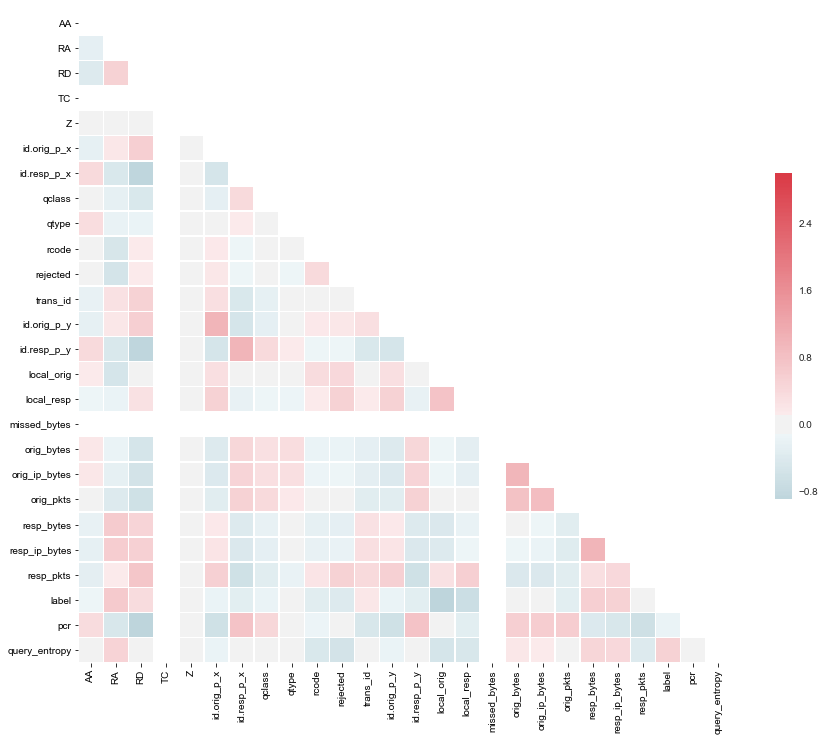

In [7]:
f, ax = plt.subplots(figsize=(16, 12))
sns.set(style='white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, 
            center=0, square=True, linewidths=.5, 
            cbar_kws={'shrink': .5})

In [9]:
bal_no_strings.columns

Index(['AA', 'RA', 'RD', 'TC', 'Z', 'id.orig_p_x', 'id.resp_p_x', 'qclass',
       'qtype', 'rcode', 'rejected', 'trans_id', 'id.orig_p_y', 'id.resp_p_y',
       'local_orig', 'local_resp', 'missed_bytes', 'orig_bytes',
       'orig_ip_bytes', 'orig_pkts', 'resp_bytes', 'resp_ip_bytes',
       'resp_pkts', 'label', 'pcr', 'query_entropy'],
      dtype='object')

In [10]:
bal_eng = bal_no_strings.loc[:, ['pcr', 'query_entropy', 'label']]
bal_eng.head(5)

,pcr,query_entropy,label
0,1.000000,4.104282,0
1,0.000000,2.725481,0
2,0.000000,1.921928,0
3,-0.238806,3.930610,0
4,0.000000,2.725481,0


In [11]:
bal = bal_eng.dropna(axis=0, how='any')

In [12]:
bal_eng.shape, bal.shape

((66133, 3), (65244, 3))

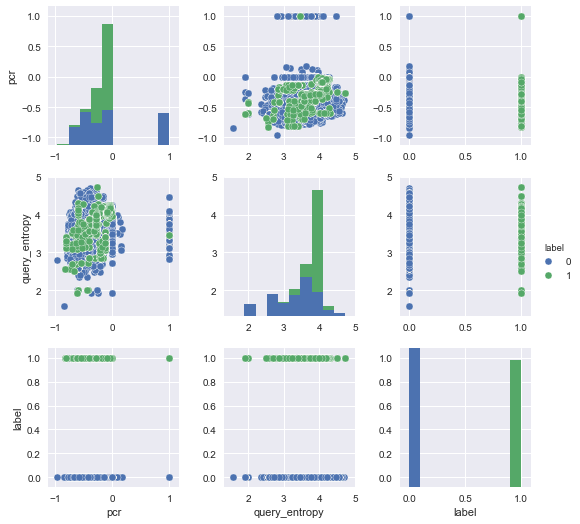

In [24]:
sns.pairplot(bal, hue='label')

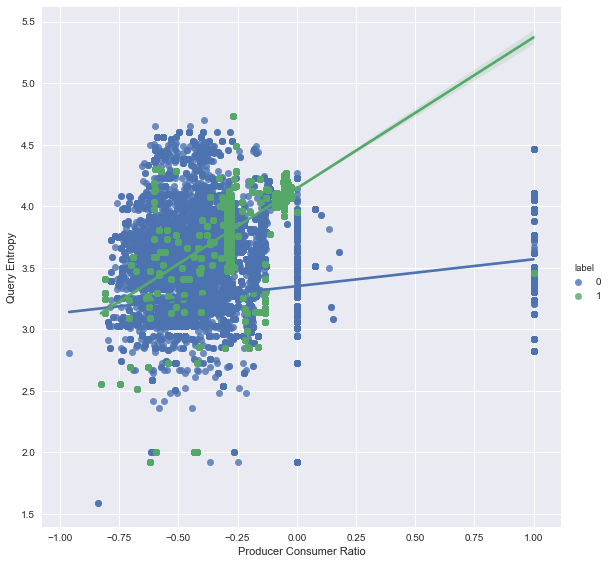

In [25]:
sns.set(color_codes=True)
g = sns.lmplot(x="pcr", y="query_entropy", hue="label",
               truncate=True, size=8, data=bal)
g.set_axis_labels("Producer Consumer Ratio", "Query Entropy")

### More Feature Engineering

In [3]:
conn_logs_df = log_munger.bro_logs_to_df('./data/home/2017-12-31', 'conn');

Successfully monitoring ./data/home/2017-12-31/conn.00:00:00-01:00:00.log...
Successfully monitoring ./data/home/2017-12-31/conn.01:00:00-02:00:00.log...
Successfully monitoring ./data/home/2017-12-31/conn.02:00:00-03:00:00.log...
Successfully monitoring ./data/home/2017-12-31/conn.04:00:00-05:00:00.log...
Successfully monitoring ./data/home/2017-12-31/conn.05:00:00-06:00:00.log...
Successfully monitoring ./data/home/2017-12-31/conn.06:00:00-07:00:00.log...
Successfully monitoring ./data/home/2017-12-31/conn.07:00:00-08:00:00.log...
Successfully monitoring ./data/home/2017-12-31/conn.08:00:00-09:00:00.log...
Successfully monitoring ./data/home/2017-12-31/conn.09:00:00-10:00:00.log...
Successfully monitoring ./data/home/2017-12-31/conn.10:00:00-11:00:00.log...
Successfully monitoring ./data/home/2017-12-31/conn.11:00:00-12:00:00.log...
Successfully monitoring ./data/home/2017-12-31/conn.12:00:00-13:00:00.log...
Successfully monitoring ./data/home/2017-12-31/conn.13:00:00-14:00:00.log...

In [23]:
conn_logs_df.columns

Index(['conn_state', 'duration', 'history', 'id.orig_h', 'id.orig_p',
       'id.resp_h', 'id.resp_p', 'local_orig', 'local_resp', 'missed_bytes',
       'orig_bytes', 'orig_cc', 'orig_ip_bytes', 'orig_pkts', 'proto',
       'resp_bytes', 'resp_cc', 'resp_ip_bytes', 'resp_pkts', 'sensorname',
       'service', 'tunnel_parents', 'uid'],
      dtype='object')

In [31]:
ips = conn_logs_df['id.resp_h'].unique()

array(['224.0.0.251', 'ff02::fb', '54.172.250.58', ..., '52.45.0.175',
       '129.186.185.33', '74.125.135.104'], dtype=object)

In [51]:
conn_logs_df.tail(100)

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,...,proto,resp_bytes,resp_cc,resp_ip_bytes,resp_pkts,sensorname,service,tunnel_parents,uid,conn_in
ts,,,,,,,,,,,,,,,,,,,,,
2017-12-31 16:58:10.802799,SF,00:00:00.010767,Dd,192.168.1.119,48773,192.168.1.1,53,True,True,0,...,udp,134,-,162,1,forest-eth1,dns,(empty),CD6CWs1JvHvT4hHKYa,NaN
2017-12-31 16:57:21.229693,S0,00:00:00,D,192.168.1.165,34290,255.255.255.255,10001,True,False,0,...,udp,0,-,0,0,forest-eth1,-,(empty),CrhW5S1NL5jzMuqi01,NaN
2017-12-31 16:57:02.410768,SF,00:00:19.664704,Dd,192.168.1.119,62375,173.194.196.189,443,True,False,0,...,udp,3147,US,3539,14,forest-eth1,-,(empty),CQD85gc9vCMioo4gg,NaN
2017-12-31 16:53:22.885125,OTH,00:00:00.060937,DdA,192.168.1.119,62270,17.188.166.19,5223,True,False,0,...,tcp,53,US,105,1,forest-eth1,-,(empty),CnMB9F4qijhPD5oL8,NaN
2017-12-31 16:58:13.480298,SF,00:00:00.015709,Dd,192.168.1.119,28899,192.168.1.1,53,True,True,0,...,udp,77,-,105,1,forest-eth1,dns,(empty),Cpc4pUMlTJxwVZbih,NaN
2017-12-31 16:58:14.585669,SF,00:00:00.011914,Dd,192.168.1.119,46868,192.168.1.1,53,True,True,0,...,udp,131,-,159,1,forest-eth1,dns,(empty),Csp3Tx3OQbA6n5zv9,NaN
2017-12-31 16:58:14.736280,SF,00:00:00.012618,Dd,192.168.1.119,41778,192.168.1.1,53,True,True,0,...,udp,129,-,157,1,forest-eth1,dns,(empty),CHmxQw2Zh91SFvLp7i,NaN
2017-12-31 16:58:14.892008,SF,00:00:00.011767,Dd,192.168.1.119,2178,192.168.1.1,53,True,True,0,...,udp,135,-,163,1,forest-eth1,dns,(empty),COV30K1BDqh3iWQb3j,NaN
2017-12-31 16:58:14.942191,SF,00:00:00.015495,Dd,192.168.1.119,13520,192.168.1.1,53,True,True,0,...,udp,87,-,115,1,forest-eth1,dns,(empty),CZc5X92KWVIeW2Kdug,NaN


In [50]:
conn_logs_df['conn_in'] = 0
conn_logs_df['conn_in'] = conn_logs_df[conn_logs_df['id.resp_h'] == '224.0.0.251']['id.resp_h'].rolling(window=8).count()
conn_logs_df[['id.resp_h', 'conn_in']]

,id.resp_h,conn_in
ts,,
2017-12-30 16:59:40.120203,224.0.0.251,1.0
2017-12-30 16:59:40.126543,ff02::fb,NaN
2017-12-30 16:55:56.784625,54.172.250.58,NaN
2017-12-30 16:59:05.387890,255.255.255.255,NaN
2017-12-30 17:00:02.518455,192.168.1.241,NaN
2017-12-30 16:38:11.437006,192.168.1.241,NaN
2017-12-30 17:00:02.409079,2620:149:a42:201::7,NaN
2017-12-30 16:59:57.967853,192.168.1.1,NaN
2017-12-30 16:59:59.363017,192.168.1.1,NaN


In [6]:
from bat.dataframe_to_matrix import DataFrameToMatrix
to_matrix = DataFrameToMatrix()
conn_matrix = to_matrix.fit_transform(conn_logs_df)

Changing column conn_state to category...
Changing column orig_cc to category...
Changing column proto to category...
Changing column resp_cc to category...
Changing column sensorname to category...
Changing column service to category...
Changing column tunnel_parents to category...
Normalizing column id.orig_p...
Normalizing column id.resp_p...
Normalizing column missed_bytes...
Normalizing column orig_bytes...
Normalizing column orig_ip_bytes...
Normalizing column orig_pkts...
Normalizing column resp_bytes...
Normalizing column resp_ip_bytes...
Normalizing column resp_pkts...


### KMeans Clustering

In [10]:
kmeans = KMeans(n_clusters=5).fit_predict(conn_matrix)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### PCA Decomposition

In [21]:
pca = PCA(n_components=5)
pca.fit(conn_matrix)
print(sum(pca.explained_variance_ratio_), '=', pca.explained_variance_ratio_)
print(pca.n_components_)

0.871823533996 = [ 0.33635707  0.28457542  0.11819462  0.07761843  0.05507799]
5


In [ ]:
X = bal.copy(deep=True)
y = X.pop('label')

### DBSCAN Clustering

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [14]:
bal.columns

Index(['pcr', 'query_entropy', 'label'], dtype='object')

In [15]:
X = bal.copy(deep=True)
y = bal.pop('label')

In [ ]:
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
y_pred = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(y_pred)) - (1 if -1 in y_pred else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_pred))
print("Completeness: %0.3f" % metrics.completeness_score(y, y_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_pred))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_pred))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, y_pred))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, y_pred))

Estimated number of clusters: 12
Homogeneity: 1.000
Completeness: 0.493
V-measure: 0.661
Adjusted Rand Index: 0.640
Adjusted Mutual Information: 0.493


In [ ]:
# # DON'T RUN -- LOTS OF CPU CYCLES BUT NO OUTPUT
# # Plot result
# import matplotlib.pyplot as plt

# # Black removed and is used for noise instead.
# unique_labels = set(y_pred)
# colors = [plt.cm.Spectral(each)
#           for each in np.linspace(0, 1, len(unique_labels))]
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]

#     class_member_mask = (labels == k)

#     xy = X[class_member_mask & core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=14)

#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()

Estimated number of clusters: 12
Homogeneity: 1.000
Completeness: 0.493
V-measure: 0.661
Adjusted Rand Index: 0.640
Adjusted Mutual Information: 0.493


array([[ 2.4773179 ,  0.82408853, -0.95523427],
       [ 0.1892731 , -1.58475333, -0.95523427],
       [ 0.1892731 , -2.98860381, -0.95523427],
       ..., 
       [-0.48523722,  0.17874303,  1.04686361],
       [-0.46636547,  0.42657563,  1.04686361],
       [-0.44704705,  0.63156539,  1.04686361]])

### SVD and Logistic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import linear_model

In [ ]:
scaler = StandardScaler()
svd = decomposition.TruncatedSVD(n_components=15, random_state=37, n_iter=10)
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA(n_components=10, random_state=37)

pipeline = Pipeline(steps=[('scaler', scaler), ('pca', pca)])  #, ('svd', svd), ('logistic', logistic)


In [ ]:
numerics = X_train.copy(deep=True)
numerics = numerics.drop(['TTLs', 'answers', 'conn_state', 'history', 'id.orig_h_x', 
                          'id.orig_h_y', 'id.resp_h_x', 'id.resp_h_y', 'proto_x', 'proto_y',
                          'qclass_name', 'qtype_name', 'query', 'rcode_name', 'service', 'tunnel_parents',
                          'uid'], axis=1)

In [ ]:
# Convert timedeltas to seconds
numerics = numerics.drop(['duration'], axis=1)

In [ ]:
x_temp = numerics.values
type(numerics), type(x_temp), x_temp.shape

In [ ]:
numerics.info()

In [ ]:
# get the data
X_digits = numerics.values
y_digits = y_train.values

In [ ]:
type(X_digits)

In [ ]:
X_digits[1:5, :].T

In [ ]:
row = X_digits[0, :]
print(row)
for i in range(X_digits.shape[1]):
    print(type(X_digits[:, i]))

In [ ]:
indx = np.where(np.isnan(X_digits))

In [ ]:

# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(svd.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(svd__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['svd'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()